In [150]:
import numpy as np
import pandas as pd 
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')

In [151]:
# Training data
data_app_train = pd.read_csv('DATA/application_train.csv')
print('Training data shape: ', data_app_train.shape)
data_app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [152]:
# Testing data features
data_app_test = pd.read_csv('DATA/application_test.csv')
print('Testing data shape: ', data_app_test.shape)
data_app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


0    282686
1     24825
Name: TARGET, dtype: int64

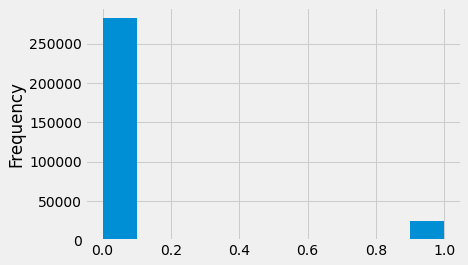

In [153]:
data_app_train['TARGET'].astype(int).plot.hist()
data_app_train['TARGET'].value_counts()

##### Détermination des données manquantes

In [154]:
def missing_values_table(df):
    
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print("Il y a " + str(df.shape[1]) + " colonnes dans ce dataset.\n"      
            "Il y a " + str(mis_val_table_ren_columns.shape[0]) +
              " colonnes ayant des valeurs manquantes.")
        
        # Return the dataframe with missing information
        return(mis_val_table_ren_columns)


In [155]:
missing_values = missing_values_table(data_app_train)
missing_values.head(20)

Il y a 122 colonnes dans ce dataset.
Il y a 67 colonnes ayant des valeurs manquantes.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


##### Nombre de classes par colonnes

In [156]:
data_app_train.head(1)
# df_app_train['NAME_TYPE_SUITE'] = df_app_train['NAME_TYPE_SUITE'].replace(np.nan, 'UNKNOW')
# df_app_train['NAME_TYPE_SUITE'].unique()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [157]:
data_app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

##### Encodage des labels pour la PCA

In [158]:
# Create a label encoder object
encoding = LabelEncoder()
encoding_count = 0
df_app_train = data_app_train.copy().dropna()
df_app_test = data_app_test.copy().dropna()

# Iterate through the columns
for col in df_app_train:
    
    if df_app_train[col].dtype == 'object':
        
        # If 2 or fewer unique categories
        
        if len(list(df_app_train[col].unique())) <= 2:
            print(col)
            # Train on the training data
            encoding.fit(df_app_train[col])
            # Transform both training and testing data
            df_app_train[col] = encoding.transform(df_app_train[col])
            df_app_test[col] = encoding.transform(df_app_test[col])
            
            # Keep track of how many columns were label encoded
            encoding_count += 1
            
print('%d colonnes ont été encodées.' % encoding_count)

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
EMERGENCYSTATE_MODE
5 colonnes ont été encodées.


In [159]:
# for col in df_app_train:
    
#     if df_app_train[col].dtype == 'object':
                
#         print(col)
#         # Train on the training data
#         encoding.fit(df_app_train[col])
#         # Transform both training and testing data
#         df_app_train[col] = encoding.transform(df_app_train[col])
# #         df_app_test[col] = encoding.transform(df_app_test[col])
            
#         # Keep track of how many columns were label encoded
#         encoding_count += 1
            
# print('%d colonnes ont été encodées.' % encoding_count)

In [160]:
df_app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,0,1,0,1,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,0,0,0,1,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,0,0,0,0,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,0,1,0,0,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,0,1,0,0,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0


In [161]:
df_app_train.CODE_GENDER.dtype

dtype('int64')

In [162]:
# one-hot encoding of categorical variables
df_app_train = pd.get_dummies(df_app_train)
df_app_test = pd.get_dummies(df_app_test)

print('Training Features shape: ', df_app_train.shape)
print('Testing Features shape: ', df_app_test.shape)

Training Features shape:  (8602, 231)
Testing Features shape:  (1739, 228)


In [163]:
df_app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden
71,100083,0,0,1,0,1,0,103500.0,573628.5,24435.0,...,1,0,0,0,0,0,0,0,1,0
124,100145,0,0,0,0,1,1,202500.0,260725.5,16789.5,...,1,0,0,0,0,0,0,1,0,0
152,100179,0,0,0,0,0,0,202500.0,675000.0,53329.5,...,1,0,0,0,0,1,0,0,0,0
161,100190,0,0,1,0,0,0,162000.0,263686.5,24781.5,...,1,0,0,0,0,0,0,1,0,0
255,100295,1,0,1,0,0,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0,0,0,1,0,0


In [164]:
train_labels = df_app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
df_app_train, df_app_test = df_app_train.align(df_app_test, join = 'inner', axis = 1)

# Add the target back in
df_app_train['TARGET'] = train_labels

print('Training Features shape: ', df_app_train.shape)
print('Testing Features shape: ', df_app_test.shape)

Training Features shape:  (8602, 228)
Testing Features shape:  (1739, 227)


#### Exploration des datasets
- https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

In [165]:
data_app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Correlation entre l'âge des clients et de la cible -0.07823930830982694


Text(0, 0.5, 'Freq')

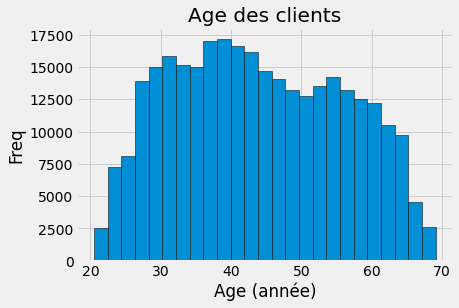

In [166]:
# Find the correlation of the positive days since birth and target
data_app_train['DAYS_BIRTH'] = abs(data_app_train['DAYS_BIRTH'])
print("Correlation entre l'âge des clients et de la cible",
      data_app_train['DAYS_BIRTH'].corr(data_app_train['TARGET']))

# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(data_app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age des clients'); plt.xlabel('Age (année)'); plt.ylabel('Freq')

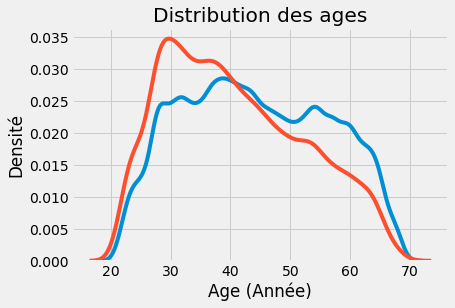

In [167]:
# plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(data_app_train.loc[data_app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(data_app_train.loc[data_app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (Année)'); plt.ylabel('Densité'); plt.title('Distribution des ages');

In [168]:
# Age information into a separate dataframe
age_data = data_app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [169]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0.5, 1.0, 'Echec de remboursement par groupe d âge')

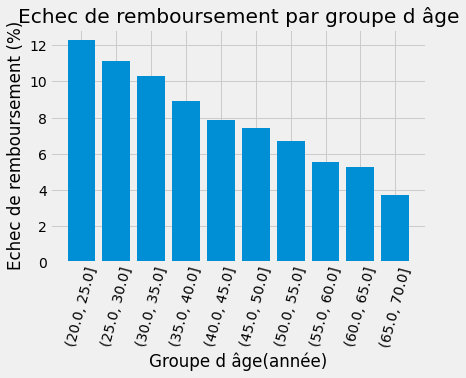

In [170]:
# plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Groupe d'' âge(année)') 
plt.ylabel('Echec de remboursement (%)')
plt.title('Echec de remboursement par groupe d'' âge')

##### Source extérieures:

- Les 3 variables avec les corrélations négatives les plus fortes avec la cible sont EXT_SOURCE_1, EXT_SOURCE_2 et EXT_SOURCE_3. Selon la documentation, ces caractéristiques représentent un « score normalisé provenant d'une source de données externe ». Il pourrait s'agir d'une sorte de cote de crédit cumulative établie à l'aide de nombreuses sources de données.

In [171]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = data_app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

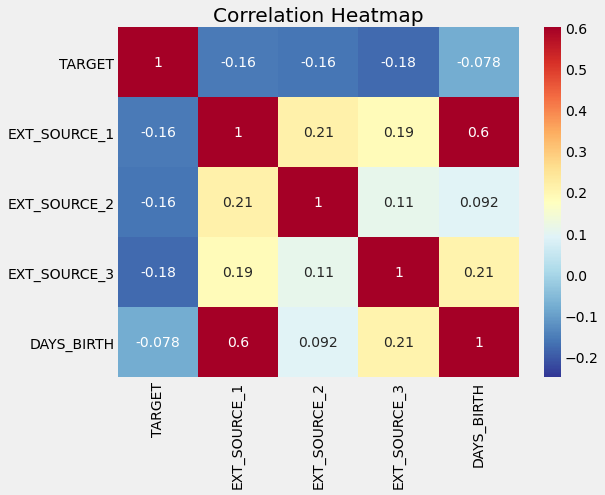

In [172]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')

- Les trois caractéristiques EXT_SOURCE ont des corrélations négatives avec la cible, ce qui indique qu'à mesure que la valeur de EXT_SOURCE augmente, le client est plus susceptible de rembourser le prêt. Nous pouvons également voir que DAYS_BIRTH est positivement corrélé avec EXT_SOURCE_1, indiquant que l'un des facteurs de ce score est peut-être l'âge du client.

Ré-équilibrage des données avec smote

#### On remplace les NaNs par imputation

In [173]:
# Make a new dataframe for polynomial features
poly_features = df_app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = df_app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')


poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [174]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features and create new features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (8602, 35)


In [175]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1',
                                                     'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

#### Features importances

In [176]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH   -0.188611
EXT_SOURCE_1^2 DAYS_BIRTH              -0.171169
EXT_SOURCE_1 DAYS_BIRTH                -0.148350
EXT_SOURCE_2^2 DAYS_BIRTH              -0.132466
EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH   -0.123460
EXT_SOURCE_2 DAYS_BIRTH                -0.109273
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH   -0.097179
EXT_SOURCE_3^2 DAYS_BIRTH              -0.062774
EXT_SOURCE_3 DAYS_BIRTH                -0.054589
DAYS_BIRTH                             -0.042716
Name: TARGET, dtype: float64
EXT_SOURCE_1 EXT_SOURCE_2      0.223166
EXT_SOURCE_1 EXT_SOURCE_2^2    0.237225
EXT_SOURCE_1^2 EXT_SOURCE_2    0.240947
TARGET                         1.000000
1                                   NaN
Name: TARGET, dtype: float64


In [177]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = df_app_train['SK_ID_CURR']
df_app_train_poly = df_app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = df_app_test['SK_ID_CURR']
df_app_test_poly = df_app_train.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
df_app_train_poly, df_app_test_poly = df_app_train_poly.align(df_app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', df_app_train_poly.shape)
print('Testing data with polynomial features shape:  ', df_app_test_poly.shape)


Training data with polynomial features shape:  (8602, 262)
Testing data with polynomial features shape:   (8602, 262)


In [178]:
data_app_train_domain = df_app_train.copy()
data_app_test_domain = df_app_test.copy()

data_app_train_domain['CREDIT_INCOME_PERCENT'] = data_app_train_domain['AMT_CREDIT'] / data_app_train_domain['AMT_INCOME_TOTAL']
data_app_train_domain['ANNUITY_INCOME_PERCENT'] = data_app_train_domain['AMT_ANNUITY'] / data_app_train_domain['AMT_INCOME_TOTAL']
data_app_train_domain['CREDIT_TERM'] = data_app_train_domain['AMT_ANNUITY'] / data_app_train_domain['AMT_CREDIT']
data_app_train_domain['DAYS_EMPLOYED_PERCENT'] = data_app_train_domain['DAYS_EMPLOYED'] / data_app_train_domain['DAYS_BIRTH']

- CREDIT_INCOME_PERCENT : le pourcentage du montant du crédit par rapport aux revenus d'un client
- ANNUITY_INCOME_PERCENT : le pourcentage de la rente du prêt par rapport aux revenus d'un client
- CREDIT_TERM : la durée du versement en mois (puisque la rente est le montant mensuel dû
- DAYS_EMPLOYED_PERCENT : le pourcentage des jours occupés par rapport à l'âge du clien

In [179]:
data_app_test_domain['CREDIT_INCOME_PERCENT'] = data_app_test_domain['AMT_CREDIT'] / data_app_test_domain['AMT_INCOME_TOTAL']
data_app_test_domain['ANNUITY_INCOME_PERCENT'] = data_app_test_domain['AMT_ANNUITY'] / data_app_test_domain['AMT_INCOME_TOTAL']
data_app_test_domain['CREDIT_TERM'] = data_app_test_domain['AMT_ANNUITY'] / data_app_test_domain['AMT_CREDIT']
data_app_test_domain['DAYS_EMPLOYED_PERCENT'] = data_app_test_domain['DAYS_EMPLOYED'] / data_app_test_domain['DAYS_BIRTH']

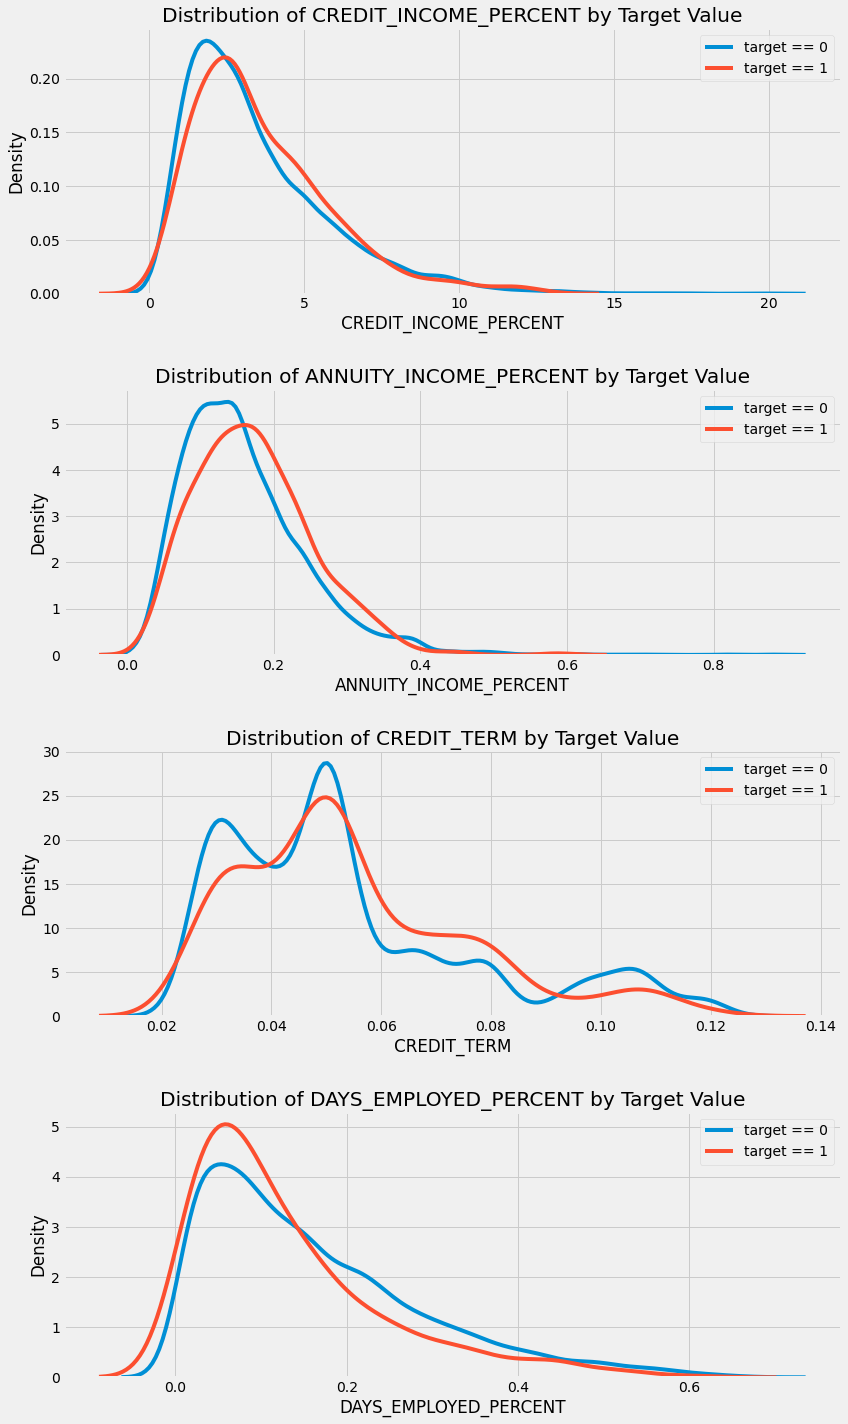

In [180]:
plt.figure(figsize = (12, 20))

# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(data_app_train_domain.loc[data_app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(data_app_train_domain.loc[data_app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    plt.legend()
    
plt.tight_layout(h_pad = 2.5)


## Modèles de scoring

### Data
- Pour obtenir une baseline, nous utilisons toutes les features après avoir encodé les variables catégorielles. On remplace les valeurs manquantes (imputation) et on normalise le dataset (mise à l'échelle des caractéristiques). 

In [357]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

train_labels = df_app_train['TARGET']

# Drop the target from the training data
if 'TARGET' in df_app_train:
    train = df_app_train.drop(columns = ['TARGET'])
else:
    train = df_app_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = df_app_test.copy()

# imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(df_app_test)

# balance the target dataset
oversample = SMOTE()
# train, train_labels = oversample.fit_resample(train, train_labels)
train, train_labels = oversample.fit_sample(train, train_labels)

In [293]:
Counter(train_labels)

Counter({0: 8076, 1: 8076})

Training data shape:  (16152, 227)
Testing data shape:  (1739, 227)


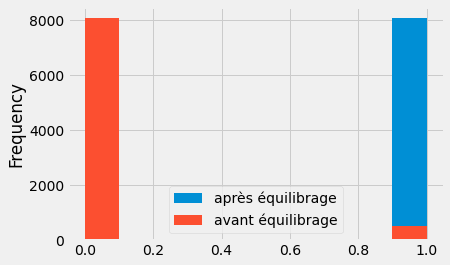

In [305]:
# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(train)
train = scaler.transform(train)
# test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

plt.hist(train_labels, label='après équilibrage')
df_app_train['TARGET'].plot.hist(label='avant équilibrage')
# data_app_train['TARGET'].value_counts(), train_labels.value_counts()
plt.legend()

### Modèle 1: Régression logisitque

In [295]:
train1 = train.copy()
train_labels1 = train_labels

In [296]:
df = pd.DataFrame(train1, columns=df_app_train.columns[:-1]) 
df['TARGET'] = train_labels1
df = df.sample(frac=1) # frac=1 : shuffe 100%
size = np.random.rand(len(df)) < 0.8
train = df[size]
test = df[~size]
train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,TARGET
9928,0.146514,0.0,0.000000,0.0,1.000000,0.212524,0.033453,0.148584,0.127260,0.101124,...,0.0,0.0,0.000000,0.0,0.0,0.531309,0.000000,0.468691,0.0,1
9203,0.218144,0.0,0.309375,0.0,0.690625,0.000000,0.032384,0.076628,0.109161,0.070892,...,0.0,0.0,0.690625,0.0,0.0,0.000000,0.309375,0.000000,0.0,1
14596,0.933094,0.0,0.402498,0.0,1.000000,0.000000,0.054924,0.125584,0.149165,0.097095,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.597502,0.402498,0.0,1
4019,0.469792,0.0,0.000000,0.0,1.000000,0.200000,0.017632,0.190674,0.107325,0.157303,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0,0
10664,0.142020,0.0,1.000000,0.0,1.000000,0.000000,0.042821,0.244629,0.224649,0.213483,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.836109,0.163891,0.0,1


In [343]:
df_app_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,TARGET
71,100083,0,1,0,1,0,103500.0,573628.5,24435.0,463500.0,...,0,0,0,0,0,0,0,1,0,0
124,100145,0,0,0,1,1,202500.0,260725.5,16789.5,198000.0,...,0,0,0,0,0,0,1,0,0,0
152,100179,0,0,0,0,0,202500.0,675000.0,53329.5,675000.0,...,0,0,0,0,1,0,0,0,0,0
161,100190,0,1,0,0,0,162000.0,263686.5,24781.5,238500.0,...,0,0,0,0,0,0,1,0,0,0
255,100295,0,1,0,0,1,225000.0,1019205.0,31032.0,774000.0,...,0,0,0,0,0,0,1,0,0,1


In [360]:
X_test_inv = pd.DataFrame(scaler.inverse_transform(X_test), columns = X_test.columns)
# X_test_inv.to_csv('DATA/X_test_inv.csv')
X_test_inv.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden
0,141357.000000,0.000000,0.000000,0.0,1.0,1.000000,292500.000000,477000.000000,15516.000000,477000.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0
1,329396.952187,0.669746,0.669746,0.0,0.0,0.000000,150069.295382,280680.894817,15118.407466,267027.718153,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.330254,0.669746,0.0
2,264075.000000,0.000000,0.000000,0.0,1.0,0.000000,335848.500000,667350.000000,25416.000000,596488.500000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0
3,109050.812048,0.000000,0.000000,0.0,0.0,0.927118,109311.880539,481379.391891,21960.868096,452413.985067,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.536441,0.463559,0.0
4,352719.000000,1.000000,0.000000,0.0,1.0,1.000000,202500.000000,450000.000000,22500.000000,450000.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0


In [362]:
scaler.fit(X_test_inv)

MinMaxScaler()

In [297]:
X_train, y_train = train.iloc[:,:-1], train.iloc[:,-1]
X_test, y_test = test.iloc[:,:-1], test.iloc[:,-1]
X_test.to_csv('DATA/X_test.csv')
X_train.shape, X_test.shape

((12913, 227), (3239, 227))

In [250]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001) # a lower value should decrease overfitting

# Train on the training data
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.0001)

In [251]:
# Make predictions
# Make sure to select the second column only
log_reg_pred_prob = log_reg.predict_proba(X_test)[:, 1]
log_reg_pred = log_reg.predict(X_test)

In [252]:
data_res = pd.DataFrame([log_reg_pred, log_reg_pred_prob]).T
data_res.columns = ['TARGET', 'TARGET_probability']
data_res['TARGET_probability'].unique()

array([0.522901  , 0.49722255, 0.50202114, ..., 0.50641786, 0.50257505,
       0.52514712])

In [264]:
# Submission dataframe
submit = test[['SK_ID_CURR', 'TARGET']]
submit['TARGET_LR'] = log_reg_pred
submit['TARGET_LR_Prob'] = log_reg_pred_prob

submit.head()

,SK_ID_CURR,TARGET,TARGET_LR,TARGET_LR_Prob
SK_ID_CURR,,,,
5114,0.597954,0,1,0.522901
4771,0.555462,0,0,0.497223
8872,0.059224,1,1,0.502021
16062,0.305608,1,0,0.498008
4530,0.527580,0,1,0.504405


In [254]:
df = pd.DataFrame(log_reg.coef_.reshape(len(X_test.columns),1))
df.index = features
df.columns = ['LR score']
df.sort_values(by='LR score', ascending=False)

,LR score
NAME_EDUCATION_TYPE_Secondary / secondary special,0.032927
FLAG_DOCUMENT_3,0.030985
REGION_RATING_CLIENT_W_CITY,0.020722
OCCUPATION_TYPE_Laborers,0.020253
CODE_GENDER,0.019002
...,...
NAME_FAMILY_STATUS_Married,-0.021984
NAME_EDUCATION_TYPE_Higher education,-0.031896
EXT_SOURCE_2,-0.032279
EXT_SOURCE_1,-0.038161


### Modèle 2: RandomForest

In [99]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

# Train on the training data
random_forest.fit(X_train, y_train)

# Extract feature importances
feature_importance_values_RF = random_forest.feature_importances_
feature_importances_RF = pd.DataFrame({'feature': features, 'importance': feature_importance_values_RF})

# Make predictions on the test data
# predictions = random_forest.predict_proba(test)[:, 1]
predictions = random_forest.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.9s finished


In [100]:
submit['TARGET_RF'] = predictions
submit.head()

,SK_ID_CURR,TARGET,TARGET_LR,TARGET_RF
351423,0.291631,1,1,1
340479,0.388825,1,0,1
429848,0.700301,1,1,1
206383,0.671464,0,0,0
558112,0.276014,1,1,1


- Les prédictions représentent une probabilité comprise entre 0 et 1 que le prêt ne sera pas remboursé. Si nous utilisions ces prédictions pour classer les candidats, nous pourrions définir un seuil de probabilité pour déterminer qu'un prêt est risqué.

In [148]:
df = pd.DataFrame(feature_importance_values_RF)
df.index = features
df.columns = ['RF score']
df.sort_values(by='RF score', ascending=False)

,RF score
CODE_GENDER_M,4.571576e-02
CODE_GENDER_F,4.066554e-02
EXT_SOURCE_3,3.901738e-02
EMERGENCYSTATE_MODE_No,3.642763e-02
HOUSETYPE_MODE_block of flats,3.225316e-02
...,...
FLAG_DOCUMENT_4,4.833927e-08
NAME_INCOME_TYPE_Businessman,0.000000e+00
FLAG_DOCUMENT_10,0.000000e+00
FLAG_DOCUMENT_12,0.000000e+00


### Modèle 3: XGBOOST

In [101]:
from xgboost import XGBClassifier


# Make the random forest classifier
XGBOOST_Classifier = XGBClassifier(n_estimators = 50)

# Train on the training data
XGBOOST_Classifier.fit(X_train, y_train)

# Extract feature importances
feature_importance_values_XG = XGBOOST_Classifier.feature_importances_
feature_importances_XG = pd.DataFrame({'feature': features, 'importance': feature_importance_values_XG})

# Make predictions on the test data
# predictions = XGBOOST_Classifier.predict_proba(test)[:, 1]
predictions = XGBOOST_Classifier.predict(X_test)

In [102]:
submit['TARGET_XG'] = predictions
submit.head(10)

,SK_ID_CURR,TARGET,TARGET_LR,TARGET_RF,TARGET_XG
351423,0.291631,1,1,1,1
340479,0.388825,1,0,1,1
429848,0.700301,1,1,1,1
206383,0.671464,0,0,0,0
558112,0.276014,1,1,1,1
294921,0.959068,1,1,0,0
146280,0.476072,0,0,0,0
226666,0.736968,0,0,0,0
425028,0.943770,1,0,1,1
534177,0.775806,1,0,1,1


In [147]:
df = pd.DataFrame(feature_importance_values_XG)
df.index = features
df.columns = ['XG score']
df.sort_values(by='XG score', ascending=False)

,score
REG_CITY_NOT_WORK_CITY,0.091711
NAME_EDUCATION_TYPE_Secondary / secondary special,0.078113
FLAG_PHONE,0.072370
NAME_INCOME_TYPE_Working,0.045633
OBS_30_CNT_SOCIAL_CIRCLE,0.041651
...,...
ORGANIZATION_TYPE_Industry: type 12,0.000000
NAME_TYPE_SUITE_Other_B,0.000000
ORGANIZATION_TYPE_Industry: type 10,0.000000
"NAME_TYPE_SUITE_Spouse, partner",0.000000


/Users/jabarianmaxime/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_plot/confusion_matrix.py:162: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(self.im_, ax=ax)
/Users/jabarianmaxime/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_plot/confusion_matrix.py:162: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(self.im_, ax=ax)
/Users/jabarianmaxime/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_plot/confusion_matrix.py:162: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(self.im_, ax=ax)


,f1_sc,fbeta_sc,accuracy_sc,precision_sc,recall_sc
LR,0.680724,0.676991,0.676932,0.670553,0.691209
RF,0.954973,0.958626,0.957062,0.999981,0.913843
XG,0.954753,0.958158,0.956753,0.997240,0.915739


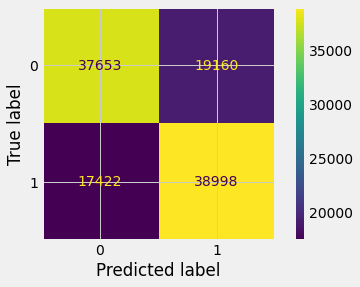

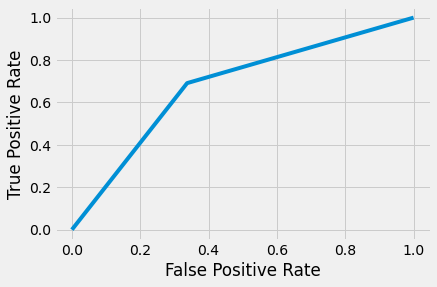

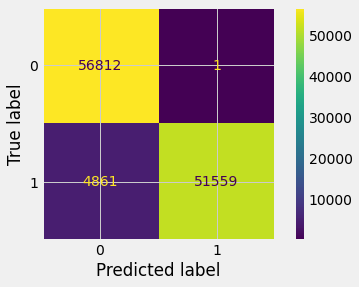

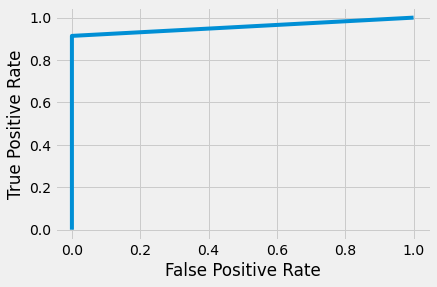

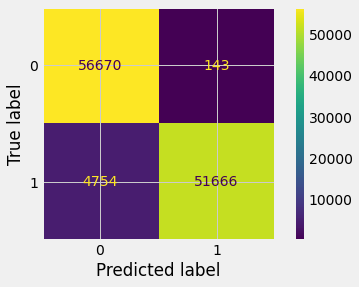

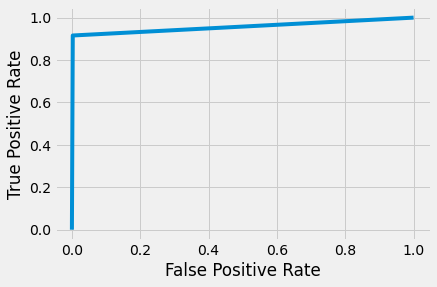

In [139]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, fbeta_score

y_test = submit['TARGET']
y_preds = submit['TARGET_LR'], submit['TARGET_RF'], submit['TARGET_XG']
modeles = ['LR', 'RF', 'XG']
table_resume = pd.DataFrame()
table_resume.index.name = 'models'

s = 0

for y_p in y_preds:
    
    table_resume.loc[s,'f1_sc'] = f1_score(y_test, y_p)
    table_resume.loc[s,'fbeta_sc'] = fbeta_score(y_test, y_p, average='weighted', beta=0.5)
    table_resume.loc[s,'accuracy_sc'] = accuracy_score(y_test, y_p)
    table_resume.loc[s,'precision_sc'] = precision_score(y_test, y_p)
    table_resume.loc[s,'recall_sc'] = recall_score(y_test, y_p)

    
    cm = confusion_matrix(y_test, y_p)
    cm_display = ConfusionMatrixDisplay(cm).plot()
    fpr, tpr, _ = roc_curve(y_test, y_p)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    
    s+=1

table_resume.index = modeles
table_resume

#### Méthode Shap: Features_importances
https://www.aquiladata.fr/insights/shap-mieux-comprendre-linterpretation-de-modeles/

In [161]:
import shap

explainer = shap.TreeExplainer(XGBOOST_Classifier)
shap_values = explainer.shap_values(X_test)
# np.abs(shap_values.sum(1) + explainer.expected_value - pred).max()

NPY_ARRAY_UPDATEIFCOPY, NPY_ARRAY_INOUT_ARRAY, and NPY_ARRAY_INOUT_FARRAY are deprecated, use NPY_WRITEBACKIFCOPY, NPY_ARRAY_INOUT_ARRAY2, or NPY_ARRAY_INOUT_FARRAY2 respectively instead, and call PyArray_ResolveWritebackIfCopy before the array is deallocated, i.e. before the last call to Py_DECREF.
UPDATEIFCOPY detected in array_dealloc.  Required call to PyArray_ResolveWritebackIfCopy or PyArray_DiscardWritebackIfCopy is missing
NPY_ARRAY_UPDATEIFCOPY, NPY_ARRAY_INOUT_ARRAY, and NPY_ARRAY_INOUT_FARRAY are deprecated, use NPY_WRITEBACKIFCOPY, NPY_ARRAY_INOUT_ARRAY2, or NPY_ARRAY_INOUT_FARRAY2 respectively instead, and call PyArray_ResolveWritebackIfCopy before the array is deallocated, i.e. before the last call to Py_DECREF.
UPDATEIFCOPY detected in array_dealloc.  Required call to PyArray_ResolveWritebackIfCopy or PyArray_DiscardWritebackIfCopy is missing
NPY_ARRAY_UPDATEIFCOPY, NPY_ARRAY_INOUT_ARRAY, and NPY_ARRAY_INOUT_FARRAY are deprecated, use NPY_WRITEBACKIFCOPY, NPY_ARRAY_INOUT

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


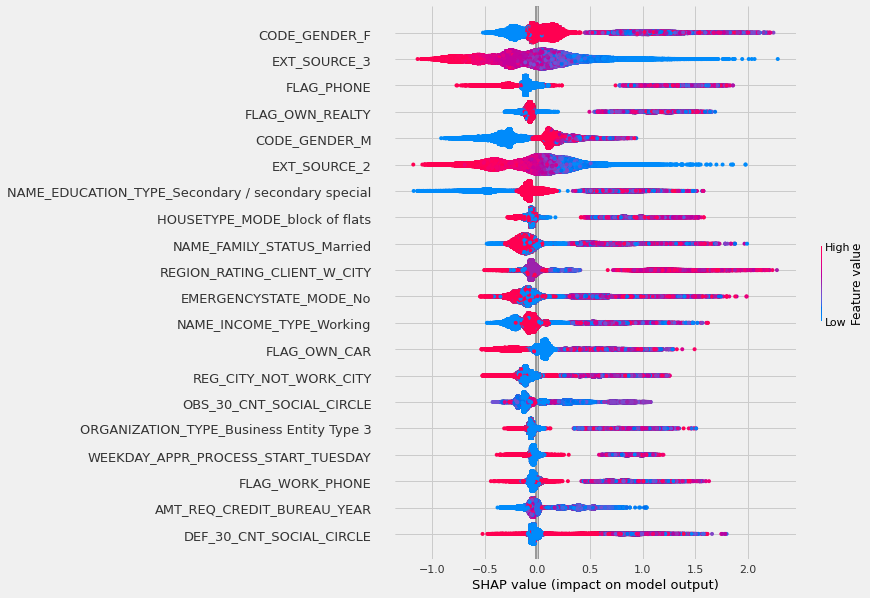

In [162]:
shap.summary_plot(shap_values, X_test)


- Méthode Shape pour les modèles ensemblistes: Tout d'abord, une réduction de dimension des features est appliquée pour rendre les calculs plus rapides dans la fonction TreeExplainer de shap, et qui classe par ordre croissant l'importance des features. Ensuite, la couleur rouge signifie que la feature à un fort impact quant à la prédiction et inversement pour la couleur bleue. Par exemple, si la majorité des points rouges ont une valeur négatives, alors la feature a un fort impacte sur la prédiction lorsque celle ci est négative.

## Sauvegarde des modèles

In [256]:
# saving the model 

import pickle 
pickle_out = open("log_reg.pkl", mode = "wb") 
pickle.dump(log_reg, pickle_out) 
pickle_out.close()

In [276]:
def preprocessing(data):

    # Create a label encoder object
    encoding = LabelEncoder()
    encoding_count = 0

    data = data.dropna()
    # Iterate through the columns
    for col in data:

        if data[col].dtype == 'object':

            # If 2 or fewer unique categories

            if len(list(data[col].unique())) <= 2:
                print(col)
                # Train on the training data
                encoding.fit(data[col])
                # Transform both training and testing data
                data[col] = encoding.transform(data[col])

                # Keep track of how many columns were label encoded
                encoding_count += 1

    print('%d colonnes ont été encodées.' % encoding_count)

    # one-hot encoding of categorical variables
    data = pd.get_dummies(data)

    return(data)


# preprocessing(df_app_train).head()

In [349]:
# data['SK_ID_CURR'] = SimpleImputer.inverse_transform(data['SK_ID_CURR'])
data.head()
# imputer = SimpleImputer(missing_values=np.nan, strategy='median', add_indicator=True)
scaler.inverse_transform(X_test)[0][0]

141357.0

In [319]:
df = pd.read_csv('DATA/application_test.csv')
data = preprocessing(df.dropna()).drop(columns='ORGANIZATION_TYPE_Trade: type 5')
# results = classify_people(model, data)

data = X_test
model = pickle.load(open('log_reg.pkl', 'rb'))
model.predict(data.iloc[0].values.reshape(1, len(data.columns)))
model.predict_proba(data.iloc[0].values.reshape(1, len(data.columns)))

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
EMERGENCYSTATE_MODE
5 colonnes ont été encodées.


array([[0.50624722, 0.49375278]])

In [333]:
choice = data['SK_ID_CURR'].values[0]
idx =  data[data['SK_ID_CURR']==choice].index
# data.iloc[idx]
data.loc[idx]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden
991,0.115892,0.0,0.0,0.0,1.0,0.2,0.057935,0.107865,0.05927,0.107865,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [335]:
data.loc[idx].values.reshape(1, len(data.columns)).shape

(1, 227)

In [219]:
df1 = data #preprocessing(pd.read_csv('DATA/application_train.csv')) 
df2 = X_train #preprocessing(pd.read_csv('DATA/application_test.csv')) 
# df1.merge(df2, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
df1.columns.difference(df2.columns)


Index(['ORGANIZATION_TYPE_Trade: type 5'], dtype='object')

In [336]:
x = np.linspace(1, len(data), len(data))
x.shape

(3239,)

In [255]:
# data['ORGANIZATION_TYPE_Trade: type 5'].unique()
# df_app_test['ORGANIZATION_TYPE_Trade: type 5'].unique()

In [73]:
data_app_train.shape, data_app_test.shape

((307511, 122), (48744, 121))

In [78]:
data_app_train['CODE_GENDER'].replace(['M', 'F'], [0, 1])

0         0
1         1
2         0
3         1
4         0
         ..
307506    0
307507    1
307508    1
307509    1
307510    1
Name: CODE_GENDER, Length: 307511, dtype: object